In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.6.0'

In [ ]:
tf.keras.__version__

'2.6.0'

Keras is a High level API for tensorflow

In [ ]:
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
tf.config.list_physical_devices("CPU")

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
mnist = tf.keras.datasets.mnist

In [ ]:
(X_train_full, y_train_full),(X_test, y_test) = mnist.load_data()

In [ ]:
X_train_full.shape

(60000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
X_train_full[0].shape

(28, 28)

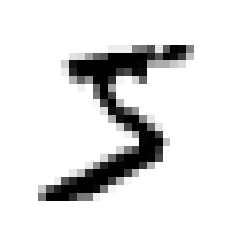

In [ ]:
img = X_train_full[0]

plt.imshow(img, cmap="binary")
plt.axis("off")
plt.show()

In [ ]:
y_train_full.shape

(60000,)

In [ ]:
y_train_full[0]

5

In [ ]:
img.max(), img.min()

(255, 0)

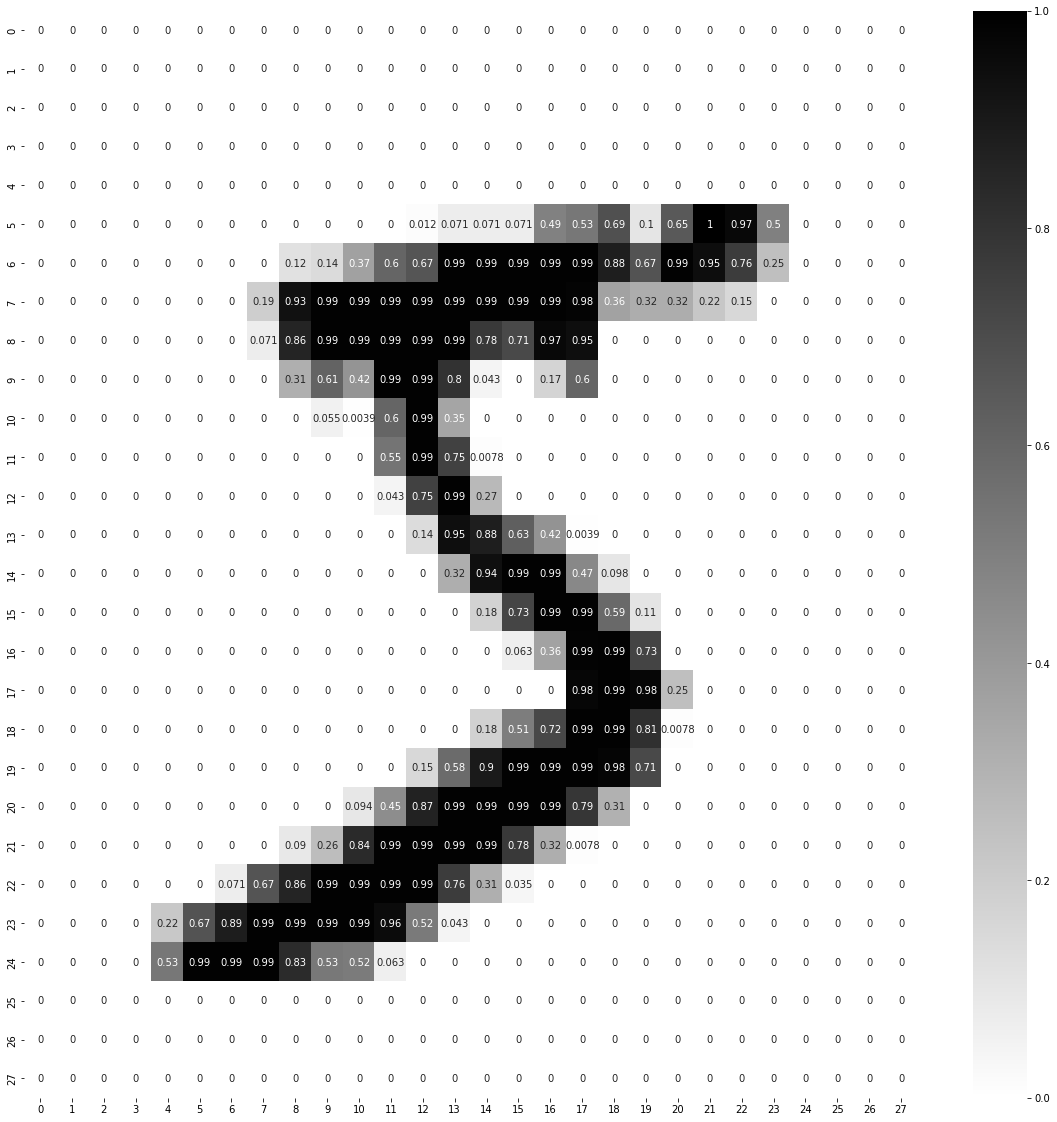

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(img/255, annot=True, cmap="binary")

In [ ]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]


X_test = X_test / 255.

In [ ]:
LAYERS = [
          tf.keras.layers.Flatten(input_shape=[28,28], name="inputLayer"),
          tf.keras.layers.Dense(300, activation="relu", name="hiddenLayer1"),
          tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer2"),
          tf.keras.layers.Dense(10, activation="softmax", name="outputLayer")
]

In [ ]:
model_clf = tf.keras.models.Sequential(LAYERS)

In [ ]:
model_clf.layers

In [ ]:
model_clf.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputLayer (Flatten)         (None, 784)               0         
_________________________________________________________________
hiddenLayer1 (Dense)         (None, 300)               235500    
_________________________________________________________________
hiddenLayer2 (Dense)         (None, 100)               30100     
_________________________________________________________________
outputLayer (Dense)          (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# firstlayer * secondlayer + bias

784*300 + 300, 300*100 + 100, 100*10 + 10

(235500, 30100, 1010)

In [ ]:
np.sum((235500, 30100, 1010))

266610

In [ ]:
model_clf.layers[1].name

'hiddenLayer1'

In [ ]:
weights, biases = model_clf.layers[1].get_weights()

In [ ]:
weights.shape

(784, 300)

In [ ]:
biases.shape

(300,)

In [ ]:
LOSS_FUNCTION = "sparse_categorical_crossentropy"
OPTIMIZER = "SGD"
METRICS = ["accuracy"]


model_clf.compile(loss=LOSS_FUNCTION, optimizer=OPTIMIZER, metrics=METRICS)

In [ ]:
55000/32 ,55000/16

(1718.75, 3437.5)

In [ ]:
EPOCHS = 30
VALIDATION = (X_valid, y_valid)

history = model_clf.fit(X_train, y_train, epochs=EPOCHS, validation_data=VALIDATION)

Epoch 1/30
1719/1719 [==============================] - 5s 2ms/step - loss: 0.6079 - accuracy: 0.8408 - val_loss: 0.2996 - val_accuracy: 0.9146
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2870 - accuracy: 0.9185 - val_loss: 0.2391 - val_accuracy: 0.9328
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2348 - accuracy: 0.9328 - val_loss: 0.2007 - val_accuracy: 0.9456
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2004 - accuracy: 0.9425 - val_loss: 0.1781 - val_accuracy: 0.9518
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1754 - accuracy: 0.9496 - val_loss: 0.1568 - val_accuracy: 0.9580
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1557 - accuracy: 0.9552 - val_loss: 0.1451 - val_accuracy: 0.9598
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1398 - accuracy: 0.9602 - val_loss: 0.1336 - val_accuracy:

In [ ]:
history.params

{'epochs': 30, 'steps': 1719, 'verbose': 1}

In [ ]:
type(history.history)

dict

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.607929,0.840764,0.299636,0.9146
1,0.286996,0.918527,0.239129,0.9328
2,0.234810,0.932800,0.200693,0.9456
3,0.200443,0.942455,0.178133,0.9518
4,0.175393,0.949564,0.156804,0.9580
5,0.155749,0.955182,0.145108,0.9598
6,0.139755,0.960236,0.133620,0.9642
7,0.127060,0.962927,0.123569,0.9678
8,0.115781,0.966418,0.116064,0.9692
9,0.106032,0.969691,0.109915,0.9678


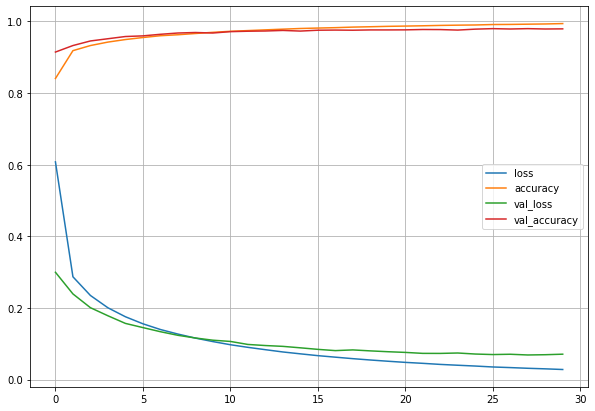

In [ ]:
pd.DataFrame(history.history).plot(figsize=(10,7))
plt.grid(True)
plt.show()

In [ ]:
model_clf.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0698 - accuracy: 0.9779


[0.06978203356266022, 0.9779000282287598]

In [ ]:
10000/32

312.5

In [ ]:
X_new = X_test[:3]

y_prob = model_clf.predict(X_new)

y_prob.round(3)

array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 1.   , 0.   ,
        0.   ],
       [0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.996, 0.   , 0.   , 0.001, 0.   , 0.   , 0.002, 0.001,
        0.   ]], dtype=float32)

In [ ]:
y_prob.shape

(3, 10)

In [ ]:
y_prob

array([[1.9864849e-06, 1.1565751e-07, 3.2372489e-05, 3.8861344e-04,
        4.2380339e-09, 6.3592648e-07, 3.8316336e-11, 9.9955839e-01,
        3.3805591e-06, 1.4476560e-05],
       [2.3141192e-07, 2.0852323e-05, 9.9994898e-01, 2.4903755e-05,
        5.4188506e-13, 1.0445499e-06, 1.3599705e-06, 4.0804824e-13,
        2.6800039e-06, 7.0474572e-13],
       [2.1401778e-05, 9.9573046e-01, 4.4809515e-04, 2.1038520e-04,
        6.8763865e-04, 4.6029789e-05, 8.9245455e-05, 1.9133070e-03,
        8.1803784e-04, 3.5380726e-05]], dtype=float32)

In [ ]:
Y_pred= np.argmax(y_prob, axis=-1)
Y_pred

array([7, 2, 1])

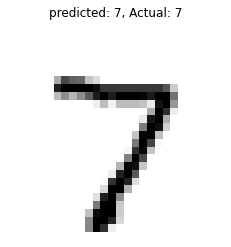

------------------------------------------------------------


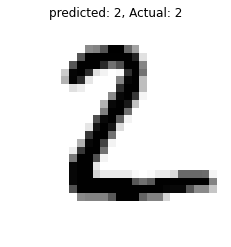

------------------------------------------------------------


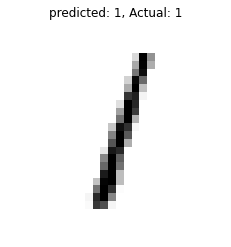

------------------------------------------------------------


In [ ]:
for img_array, pred, actual in zip(X_new, Y_pred, y_test[:3]):
  plt.imshow(img_array, cmap="binary")
  plt.title(f"predicted: {pred}, Actual: {actual}")
  plt.axis("off")
  plt.show()
  print("---"*20)

In [ ]:
model_clf.save("model.h5")

In [ ]:
a = (1,2,3)

b = (5,6,7)

for i, j in zip(a,b):
  print(i+j)

6
8
10


# Convert this code into modular python script -

file1 = creating model

file2 = getting the dataset

main_file = train on the dataset and save the model

## Connect with me -

mail to: query@ineuron.ai

cc: sunny@ineuron.ai